In [1]:
import os
import pandas as pd
import numpy as np
import time
import datetime
import missingno as msno
import warnings
warnings.filterwarnings("ignore") ##忽略警告
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号

def data_read(data_path,file_name):
    df = pd.read_csv(os.path.join(data_path,file_name),delim_whitespace = True,header = None)
    ##变量重命名
    columns = ['status_account','duration','credit_history','purpose','amount','svaing_account',
               'present_emp','income_rate','personal_status','other_debtors','residence_info',
               'property','age','inst_plans','housing','num_credits','job','dependents',
               'telephone','foreign_worker','target']
    df.columns = columns
    df.target = df.target -1
    return df

In [2]:
df = data_read('/Users/wanggaojie/PycharmProjects/IntelligentRiskControl/code/chapter4/data','german.csv')

In [3]:
def add_str(x):
    str_1 = ['%',' ','/t','$',';','@']
    str_2 = str_1[np.random.randint(0,high = len(str_1)-1)]
    return x+str_2

In [4]:
df.status_account = df.status_account.apply(add_str)

In [5]:
def category_continue_separation(df,feature_names):
    categorical_var = []
    numerical_var = []
    if 'target' in feature_names:
        feature_names.remove('target')
    ##先判断类型，如果是int或float直接作为连续变量
    numerical_var = list(df[feature_names].select_dtypes(include=['int','float','int32','float32','int64','float64']).columns.values)
    categorical_var = [x for x in feature_names if x not in numerical_var]
    return categorical_var,numerical_var

In [6]:
def add_time(num,style="%Y-%m-%d"):
    start_time = time.mktime((2010,1,1,0,0,0,0,0,0))
    stop_time = time.mktime((2015,1,1,0,0,0,0,0,0))
    re_time = []
    for i in range(num):
        rand_time = np.random.randint(start_time,stop_time)
        #将时间戳生成时间元组
        date_touple = time.localtime(rand_time)
        re_time.append(time.strftime(style,date_touple))
    return re_time

In [7]:
df['Appliy_time'] = add_time(df.shape[0], "%Y-%m-%d")

In [8]:
df

,status_account,duration,credit_history,purpose,amount,svaing_account,present_emp,income_rate,personal_status,other_debtors,...,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,target,Appliy_time
0,A11%,6,A34,A43,1169,A65,A75,4,A93,A101,...,67,A143,A152,2,A173,1,A192,A201,0,2012-03-18
1,A12$,48,A32,A43,5951,A61,A73,2,A92,A101,...,22,A143,A152,1,A173,1,A191,A201,1,2013-09-15
2,A14$,12,A34,A46,2096,A61,A74,2,A93,A101,...,49,A143,A152,1,A172,2,A191,A201,0,2012-03-12
3,A11/t,42,A32,A42,7882,A61,A74,2,A93,A103,...,45,A143,A153,1,A173,2,A191,A201,0,2012-07-25
4,A11/t,24,A33,A40,4870,A61,A73,3,A93,A101,...,53,A143,A153,2,A173,2,A191,A201,1,2011-08-21
5,A14;,36,A32,A46,9055,A65,A73,2,A93,A101,...,35,A143,A153,1,A172,2,A192,A201,0,2012-12-05
6,A14;,24,A32,A42,2835,A63,A75,3,A93,A101,...,53,A143,A152,1,A173,1,A191,A201,0,2010-03-15
7,A12$,36,A32,A41,6948,A61,A73,2,A93,A101,...,35,A143,A151,1,A174,1,A192,A201,0,2010-11-13
8,A14/t,12,A32,A43,3059,A64,A74,2,A91,A101,...,61,A143,A152,1,A172,1,A191,A201,0,2013-09-25
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,28,A143,A152,2,A174,1,A191,A201,1,2012-07-28


In [9]:
df['job_time'] = add_time(df.shape[0],"%Y/%m/%d %H:%M:%S")

In [10]:
df

,status_account,duration,credit_history,purpose,amount,svaing_account,present_emp,income_rate,personal_status,other_debtors,...,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,target,Appliy_time,job_time
0,A11%,6,A34,A43,1169,A65,A75,4,A93,A101,...,A143,A152,2,A173,1,A192,A201,0,2012-03-18,2014/11/21 04:21:39
1,A12$,48,A32,A43,5951,A61,A73,2,A92,A101,...,A143,A152,1,A173,1,A191,A201,1,2013-09-15,2013/07/18 11:37:44
2,A14$,12,A34,A46,2096,A61,A74,2,A93,A101,...,A143,A152,1,A172,2,A191,A201,0,2012-03-12,2011/03/05 10:00:14
3,A11/t,42,A32,A42,7882,A61,A74,2,A93,A103,...,A143,A153,1,A173,2,A191,A201,0,2012-07-25,2011/02/02 05:15:10
4,A11/t,24,A33,A40,4870,A61,A73,3,A93,A101,...,A143,A153,2,A173,2,A191,A201,1,2011-08-21,2010/10/24 02:31:37
5,A14;,36,A32,A46,9055,A65,A73,2,A93,A101,...,A143,A153,1,A172,2,A192,A201,0,2012-12-05,2010/03/01 08:26:43
6,A14;,24,A32,A42,2835,A63,A75,3,A93,A101,...,A143,A152,1,A173,1,A191,A201,0,2010-03-15,2011/11/02 22:55:38
7,A12$,36,A32,A41,6948,A61,A73,2,A93,A101,...,A143,A151,1,A174,1,A192,A201,0,2010-11-13,2012/05/24 22:49:23
8,A14/t,12,A32,A43,3059,A64,A74,2,A91,A101,...,A143,A152,1,A172,1,A191,A201,0,2013-09-25,2011/07/18 14:01:45
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A143,A152,2,A174,1,A191,A201,1,2012-07-28,2013/10/17 12:39:12


In [11]:
def add_row(df_temp,num):
    index_1 = np.random.randint(low=0,high=df_temp.shape[0]-1,size=num)
    return df_temp.loc[index_1]

In [13]:
df_temp = add_row(df,10)

In [14]:
df = pd.concat([df,df_temp],axis=0,ignore_index=True)

In [15]:
df.shape

(1010, 23)

In [16]:
df.head()

,status_account,duration,credit_history,purpose,amount,svaing_account,present_emp,income_rate,personal_status,other_debtors,...,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,target,Appliy_time,job_time
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A143,A152,2,A173,1,A192,A201,0,2010-11-13,2011/06/17 18:34:21
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A143,A152,1,A173,1,A191,A201,1,2013-04-19,2011/10/02 02:18:44
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A143,A152,1,A172,2,A191,A201,0,2011-04-20,2011/09/27 22:34:38
3,A11/t,42,A32,A42,7882,A61,A74,2,A93,A103,...,A143,A153,1,A173,2,A191,A201,0,2010-04-06,2010/03/31 16:49:20
4,A11;,24,A33,A40,4870,A61,A73,3,A93,A101,...,A143,A153,2,A173,2,A191,A201,1,2012-05-03,2011/09/24 23:41:38


In [17]:
pd

<module 'pandas' from '/Applications/anaconda3/lib/python3.6/site-packages/pandas/__init__.py'>

In [18]:
df.status_account.unique()

array(['A11 ', 'A12 ', 'A14 ', 'A11/t', 'A11;', 'A14/t', 'A12/t', 'A12%',
       'A12;', 'A11$', 'A14%', 'A11%', 'A12$', 'A14$', 'A13;', 'A14;',
       'A13 ', 'A13$', 'A13%', 'A13/t'], dtype=object)

In [19]:
df.status_account = df.status_account.apply(lambda x:x.replace(' ','').replace('%','').replace('/t','').replace('$','').replace('@','').replace(';',''))

In [20]:
df.status_account.unique()

array(['A11', 'A12', 'A14', 'A13'], dtype=object)

In [21]:
df['job_time'] = df['job_time'].apply(lambda x:x.split(' ')[0].replace('/','-'))

In [22]:
df['joyb_time'] = df['job_time'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d'))

In [23]:
df['Appliy_time'] = df['Appliy_time'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d'))

In [24]:
df.head()

,status_account,duration,credit_history,purpose,amount,svaing_account,present_emp,income_rate,personal_status,other_debtors,...,housing,num_credits,job,dependents,telephone,foreign_worker,target,Appliy_time,job_time,joyb_time
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A152,2,A173,1,A192,A201,0,2010-11-13,2011-06-17,2011-06-17
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A152,1,A173,1,A191,A201,1,2013-04-19,2011-10-02,2011-10-02
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A152,1,A172,2,A191,A201,0,2011-04-20,2011-09-27,2011-09-27
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A153,1,A173,2,A191,A201,0,2010-04-06,2010-03-31,2010-03-31
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A153,2,A173,2,A191,A201,1,2012-05-03,2011-09-24,2011-09-24


In [25]:
del df['joyb_time']

In [26]:
df.head()

,status_account,duration,credit_history,purpose,amount,svaing_account,present_emp,income_rate,personal_status,other_debtors,...,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,target,Appliy_time,job_time
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A143,A152,2,A173,1,A192,A201,0,2010-11-13,2011-06-17
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A143,A152,1,A173,1,A191,A201,1,2013-04-19,2011-10-02
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A143,A152,1,A172,2,A191,A201,0,2011-04-20,2011-09-27
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A143,A153,1,A173,2,A191,A201,0,2010-04-06,2010-03-31
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A143,A153,2,A173,2,A191,A201,1,2012-05-03,2011-09-24


In [27]:
df['job_time'] = df['job_time'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d'))

In [28]:
df.head()

,status_account,duration,credit_history,purpose,amount,svaing_account,present_emp,income_rate,personal_status,other_debtors,...,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,target,Appliy_time,job_time
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A143,A152,2,A173,1,A192,A201,0,2010-11-13,2011-06-17
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A143,A152,1,A173,1,A191,A201,1,2013-04-19,2011-10-02
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A143,A152,1,A172,2,A191,A201,0,2011-04-20,2011-09-27
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A143,A153,1,A173,2,A191,A201,0,2010-04-06,2010-03-31
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A143,A153,2,A173,2,A191,A201,1,2012-05-03,2011-09-24


In [29]:
df.shape

(1010, 23)

In [30]:
df.drop_duplicates(subset = None,keep = 'first',inplace = True)

In [31]:
df.shape

(1000, 23)

In [32]:
df_t = df.T

In [33]:
df_t

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
status_account,A11,A12,A14,A11,A11,A14,A14,A12,A14,A12,...,A14,A14,A11,A11,A14,A14,A11,A14,A11,A12
duration,6,48,12,42,24,36,24,36,12,30,...,12,15,18,36,12,12,30,12,45,45
credit_history,A34,A32,A34,A32,A33,A32,A32,A32,A32,A34,...,A34,A31,A32,A32,A32,A32,A32,A32,A32,A34
purpose,A43,A43,A46,A42,A40,A46,A42,A41,A43,A40,...,A46,A43,A43,A42,A40,A42,A41,A43,A43,A41
amount,1169,5951,2096,7882,4870,9055,2835,6948,3059,5234,...,3565,1569,1936,3959,2390,1736,3857,804,1845,4576
svaing_account,A65,A61,A61,A61,A61,A65,A63,A61,A64,A61,...,A65,A62,A65,A61,A65,A61,A61,A61,A61,A62
present_emp,A75,A73,A74,A74,A73,A73,A75,A73,A74,A71,...,A72,A75,A74,A71,A75,A74,A73,A75,A73,A71
income_rate,4,2,2,2,3,2,3,2,2,4,...,2,4,2,4,4,3,4,4,4,3
personal_status,A93,A92,A93,A93,A93,A93,A93,A93,A91,A94,...,A93,A93,A94,A93,A93,A92,A91,A93,A93,A93
other_debtors,A101,A101,A101,A103,A101,A101,A101,A101,A101,A101,...,A101,A101,A101,A101,A101,A101,A101,A101,A101,A101


In [34]:
df

,status_account,duration,credit_history,purpose,amount,svaing_account,present_emp,income_rate,personal_status,other_debtors,...,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,target,Appliy_time,job_time
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A143,A152,2,A173,1,A192,A201,0,2010-11-13,2011-06-17
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A143,A152,1,A173,1,A191,A201,1,2013-04-19,2011-10-02
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A143,A152,1,A172,2,A191,A201,0,2011-04-20,2011-09-27
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A143,A153,1,A173,2,A191,A201,0,2010-04-06,2010-03-31
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A143,A153,2,A173,2,A191,A201,1,2012-05-03,2011-09-24
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A143,A153,1,A172,2,A192,A201,0,2013-01-09,2010-09-03
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A143,A152,1,A173,1,A191,A201,0,2014-03-23,2012-01-20
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A143,A151,1,A174,1,A192,A201,0,2010-07-01,2012-10-24
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A143,A152,1,A172,1,A191,A201,0,2011-11-21,2013-04-18
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A143,A152,2,A174,1,A191,A201,1,2010-12-04,2013-07-05


In [35]:
df_t = df_t[~df_t.index.duplicated()]

In [36]:
df_t

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
status_account,A11,A12,A14,A11,A11,A14,A14,A12,A14,A12,...,A14,A14,A11,A11,A14,A14,A11,A14,A11,A12
duration,6,48,12,42,24,36,24,36,12,30,...,12,15,18,36,12,12,30,12,45,45
credit_history,A34,A32,A34,A32,A33,A32,A32,A32,A32,A34,...,A34,A31,A32,A32,A32,A32,A32,A32,A32,A34
purpose,A43,A43,A46,A42,A40,A46,A42,A41,A43,A40,...,A46,A43,A43,A42,A40,A42,A41,A43,A43,A41
amount,1169,5951,2096,7882,4870,9055,2835,6948,3059,5234,...,3565,1569,1936,3959,2390,1736,3857,804,1845,4576
svaing_account,A65,A61,A61,A61,A61,A65,A63,A61,A64,A61,...,A65,A62,A65,A61,A65,A61,A61,A61,A61,A62
present_emp,A75,A73,A74,A74,A73,A73,A75,A73,A74,A71,...,A72,A75,A74,A71,A75,A74,A73,A75,A73,A71
income_rate,4,2,2,2,3,2,3,2,2,4,...,2,4,2,4,4,3,4,4,4,3
personal_status,A93,A92,A93,A93,A93,A93,A93,A93,A91,A94,...,A93,A93,A94,A93,A93,A92,A91,A93,A93,A93
other_debtors,A101,A101,A101,A103,A101,A101,A101,A101,A101,A101,...,A101,A101,A101,A101,A101,A101,A101,A101,A101,A101


In [37]:
df_1 = df_t.T

In [38]:
categorical_var,numerical_var = category_continue_separation(df,list(df.columns))

In [39]:
df_1[numerical_var].describe()

,duration,amount,income_rate,residence_info,age,num_credits,dependents
count,1000,1000,1000,1000,1000,1000,1000
unique,33,921,4,4,53,4,2
top,24,1393,4,4,27,1,1
freq,184,3,476,413,51,633,845


In [40]:
df[numerical_var].describe()

,duration,amount,income_rate,residence_info,age,num_credits,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [41]:
categorical_var

['status_account',
 'credit_history',
 'purpose',
 'svaing_account',
 'present_emp',
 'personal_status',
 'other_debtors',
 'property',
 'inst_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker',
 'Appliy_time',
 'job_time']

In [42]:
numerical_var

['duration',
 'amount',
 'income_rate',
 'residence_info',
 'age',
 'num_credits',
 'dependents']

In [43]:
var_name = categorical_var+numerical_var

In [44]:
var_name

['status_account',
 'credit_history',
 'purpose',
 'svaing_account',
 'present_emp',
 'personal_status',
 'other_debtors',
 'property',
 'inst_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker',
 'Appliy_time',
 'job_time',
 'duration',
 'amount',
 'income_rate',
 'residence_info',
 'age',
 'num_credits',
 'dependents']

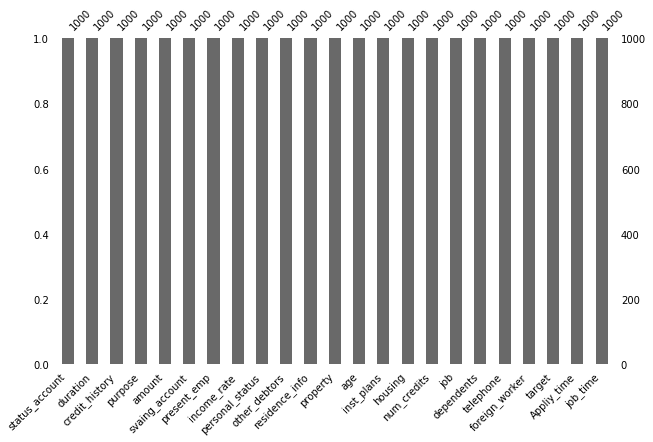

In [45]:
import matplotlib.pyplot as plt
msno.bar(df,labels=True,figsize=(10,6),fontsize=10)

In [46]:
plt.figure(figsize=(10,6))

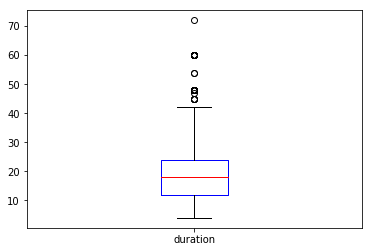

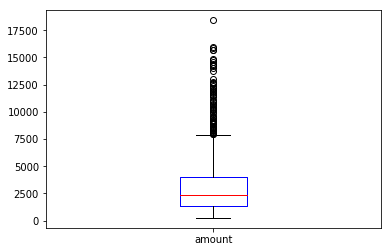

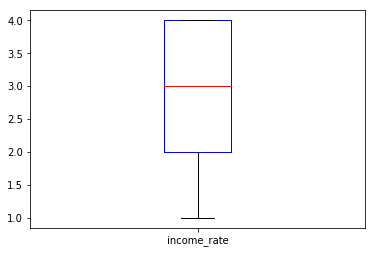

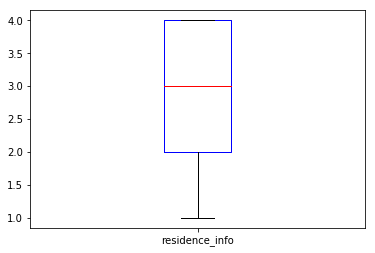

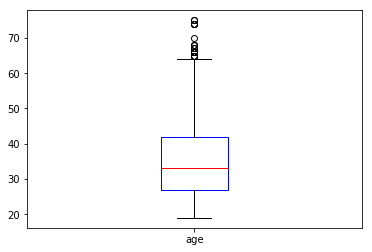

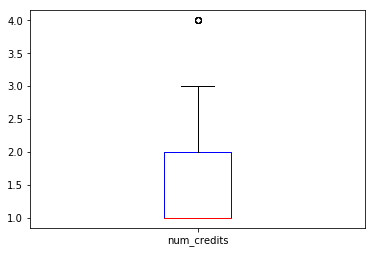

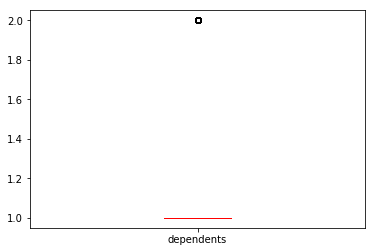

In [55]:
for j in range(1,len(numerical_var)+1):
    #plt.subplot(2,4,j)
    #取出df[numerical_var[j-1]]这一列的非空值，～符号表示取反
    df_temp = df[numerical_var[j-1]][~df[numerical_var[j-1]].isnull()]
    plt.boxplot(df_temp,notch=False,widths=0.2,medianprops={'color':'red'},boxprops=dict(color="blue"),labels=[numerical_var[j-1]],whiskerprops = {'color':"black",'markeredgecolor':"purple"})
    plt.show()

In [47]:
####查看数据分布
##连续变量不同类别下的分布
for i in numerical_var:
# i = 'duration'
    ##取非缺失值的数据
    df_temp = df.loc[~df[i].isnull(),[i,'target']]
    df_good = df_temp[df_temp.target == 0]
    df_bad = df_temp[df_temp.target == 1]
    ##计算统计量
    valid = round(df_temp.shape[0]/df.shape[0]*100,2)
    Mean = round(df_temp[i].mean(),2)
    Std = round(df_temp[i].std(),2)
    Max = round(df_temp[i].max(),2)
    Min = round(df_temp[i].min(),2)
    ##绘图
    plt.figure(figsize=(10,6))
    fontsize_1 = 12
    plt.hist(df_good[i],  bins =20, alpha=0.5,label='好样本')
    plt.hist(df_bad[i],  bins =20, alpha=0.5,label='坏样本')
    plt.ylabel(i,fontsize=fontsize_1)
    plt.title( 'valid rate='+str(valid)+'%, Mean='+str(Mean) + ', Std='+str(Std)+', Max='+str(Max)+', Min='+str(Min))
    plt.legend()
    ##保存图片
    #file = os.path.join(path,'plot_num', i+'.png')
    #plt.savefig(file)
    plt.close(1)